In [1]:
import sys
import os
import glob
import re 
import pandas as pd
import numpy as np
from lxml import etree
import requests
import time
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
color = "#669999"
cmap_20 = "tab20_r"
figsize = (10,5)

In [3]:
sys.path.append(os.path.abspath("C:/Users/calvotello/Dropbox/MTB/Göttingen/research/"))


In [4]:
from librarian_robot import downloading_datasets, map_classications_systems, tokenize, visualize, statistical_tests



# Read Data

In [5]:
df = pd.read_parquet("./../data/exemplars_secondary_literature.parquet")

In [6]:
df

medium                                              title  \
ppn                                                                    
1642067407    Aau                                              Camus   
1678415065    Oau   Livre et société dans la France du XVIIIe siècle   
1678415065    Oau   Livre et société dans la France du XVIIIe siècle   
1678415065    Oau   Livre et société dans la France du XVIIIe siècle   
1678415065    Oau   Livre et société dans la France du XVIIIe siècle   
...           ...                                                ...   
448323834     Oax                          Avantgarde und Revolution   
448323834     Oax                          Avantgarde und Revolution   
44832184X     Oax  Die @Frau im spanischen Roman nach dem Bürgerk...   
44832184X     Oax  Die @Frau im spanischen Roman nach dem Bürgerk...   
44832184X     Oax  Die @Frau im spanischen Roman nach dem Bürgerk...   

                                             title_supplement  year  \
ppn                                                                   
1642067407                                               None  1987   
1678415065                                                [1]  2019   
1678415065                                                [1]  2019   
1678415065                                                [1]  2019   
1678415065                                                [1]  2019   
...                                                       ...   ...   
448323834   Mexikanische Lyrik von López Velarde bis Octav...  1987   
448323834   Mexikanische Lyrik von López Velarde bis Octav...  1987   
44832184X   Camilo José Cela, Carmen Laforet, Ana María Ma...  1982   
44832184X   Camilo José Cela, Carmen Laforet, Ana María Ma...  1982   
44832184X   Camilo José Cela, Carmen Laforet, Ana María Ma...  1982   

                entry_first author_first_name author_last_name author_gnd_id  \
ppn                                                                            
1642067407  HDBSRO:13-09-18            Morvan         Lebesque     077112679   
1678415065     EBP:08-10-19              None             None          None   
1678415065     EBP:08-10-19              None             None          None   
1678415065     EBP:08-10-19              None             None          None   
1678415065     EBP:08-10-19              None             None          None   
...                     ...               ...              ...           ...   
448323834     6055:07-05-19              None             None          None   
448323834     6055:07-05-19              None             None          None   
44832184X     6055:07-05-19            Sylvia            Truxa          None   
44832184X     6055:07-05-19            Sylvia            Truxa          None   
44832184X     6055:07-05-19            Sylvia            Truxa          None   

           editor_first_name editor_last_name  ...  \
ppn                                            ...   
1642067407              None             None  ...   
1678415065         Geneviève          Bollème  ...   
1678415065         Geneviève          Bollème  ...   
1678415065         Geneviève          Bollème  ...   
1678415065         Geneviève          Bollème  ...   
...                      ...              ...  ...   
448323834              Klaus  Meyer-Minnemann  ...   
448323834              Klaus  Meyer-Minnemann  ...   
44832184X               None             None  ...   
44832184X               None             None  ...   
44832184X               None             None  ...   

                                           keyword_einzel_ppn  \
ppn                                                             
1642067407                                               None   
1678415065                                               None   
1678415065                                               None   
1678415065                                               None   
1678415065      

In [7]:
", ".join(df.columns.tolist())


'medium, title, title_supplement, year, entry_first, author_first_name, author_last_name, author_gnd_id, editor_first_name, editor_last_name, editor_gnd_id, isbn, ILNs, content_type, publisher, language_text, language_original, pages, format, comment_isbn, place_publication, summary, title_continuing_resource, work_ppn, work_info, work_title, expression_ppn, expression_info, expression_title, DDC_notation, DDC_sachgruppe, DDC_grundnotation, BK_ppn, BK_notation, BK_j, RVK_ppn, RVK_notation, RVK_j, RVK_k, keyword_RSWK, keyword_K10plus, keyword_project, keyword_local, keyword_045D, keyword_LoC, lcc_notation, klassifikationssystem_system, klassifikationssystem_notation, uri_description, uri, GOK_ppn, GOK_notation, GOK_j, signatur_place, signatur, signatur_date, Abrufzeichen, query, year_publication, literary_texts, source, content_type_ppn, DDC_sachgruppe_a, DDC_sachgruppe_b, DDC_sachgruppe_c, keyword_fremd_ppn, keyword_fremd, keyword_einzel_ppn, keyword_einzel, keyword_BDSL_a, keyword_BDS

In [8]:
df.shape

(1041404, 77)

# Keywords

In [9]:
keywords_columns_lt = [column for column in df.columns.tolist() if "keyword" in column if "ppn" not in column]

In [10]:
keywords_columns_lt

['keyword_RSWK',
 'keyword_K10plus',
 'keyword_project',
 'keyword_local',
 'keyword_045D',
 'keyword_LoC',
 'keyword_fremd',
 'keyword_einzel',
 'keyword_BDSL_a',
 'keyword_BDSL_p',
 'keyword_BDSL_t',
 'keyword_BDSL_s',
 'keyword_Fremddatenlieferanten_lieferanten',
 'keyword_Fremddatenlieferanten']

In [11]:
for keywords_column in keywords_columns_lt:
    print("\n\n", keywords_column, df[keywords_column].dropna().head(1))




 keyword_RSWK ppn
021627924    Bourbonnais|Mundart
Name: keyword_RSWK, dtype: object


 keyword_K10plus ppn
1678415065    Frankreich|Buchhandel|Buchproduktion|DA-3
Name: keyword_K10plus, dtype: object


 keyword_project Series([], Name: keyword_project, dtype: float64)


 keyword_local ppn
015609812     Protestbewegung| Internationalismus| Chile| G...
Name: keyword_local, dtype: object


 keyword_045D ppn
110557010X    Vereinigte Staaten|Bilaterale internationale B...
Name: keyword_045D, dtype: object


 keyword_LoC ppn
780075951    Rousseau, Jean-Jacques
Name: keyword_LoC, dtype: object


 keyword_fremd ppn
481184937    Französisch|Literatur|Klassiker|Rezeption
Name: keyword_fremd, dtype: object


 keyword_einzel ppn
442132174    Frankreich|Theater|Kleinstadt
Name: keyword_einzel, dtype: object


 keyword_BDSL_a ppn
440879493    f Aufsatzsammlung
Name: keyword_BDSL_a, dtype: object


 keyword_BDSL_p Series([], Name: keyword_BDSL_p, dtype: float64)


 keyword_BDSL_t Series([], Name: 

In [12]:
df[keywords_columns_lt].dropna(how="all")

keyword_RSWK                            keyword_K10plus  \
ppn                                                                  
1678415065         None  Frankreich|Buchhandel|Buchproduktion|DA-3   
1678415065         None  Frankreich|Buchhandel|Buchproduktion|DA-3   
1678415065         None  Frankreich|Buchhandel|Buchproduktion|DA-3   
1678415065         None  Frankreich|Buchhandel|Buchproduktion|DA-3   
1678415065         None  Frankreich|Buchhandel|Buchproduktion|DA-3   
...                 ...                                        ...   
448323834          None                                       None   
448323834          None                                       None   
44832184X          None                                       None   
44832184X          None                                       None   
44832184X          None                                       None   

            keyword_project keyword_local keyword_045D keyword_LoC  \
ppn                                                                  
1678415065              NaN          None         None        None   
1678415065              NaN          None         None        None   
1678415065              NaN          None         None        None   
1678415065              NaN          None         None        None   
1678415065              NaN          None         None        None   
...                     ...           ...          ...         ...   
448323834               NaN          None         None        None   
448323834               NaN          None         None        None   
44832184X               NaN          None         None        None   
44832184X               NaN          None         None        None   
44832184X               NaN          None         None        None   

           keyword_fremd                                     keyword_einzel  \
ppn                                                                           
1678415065          None                                               None   
1678415065          None                                               None   
1678415065          None                                               None   
1678415065          None                                               None   
1678415065          None                                               None   
...                  ...                                                ...   
448323834           None  Paz, Octavio&datl=1914-1998|Lyrik|Avantgarde|E...   
448323834           None  Paz, Octavio&datl=1914-1998|Lyrik|Avantgarde|E...   
44832184X           None  Goytisolo, Juan&datl=1931-2017|Laforet, Carmen...   
44832184X           None  Goytisolo, Juan&datl=1931-2017|Laforet, Carmen...   
44832184X           None  Goytisolo, Juan&datl=1931-2017|Laforet, Carmen...   

           keyword_BDSL_a  keyword_BDSL_p  keyword_BDSL_t  keyword_BDSL_s  \
ppn                                                                         
1678415065           None             NaN             NaN             NaN   
1678415065           None             NaN             NaN             NaN   
1678415065           None             NaN             NaN             NaN   
1678415065           None             NaN             NaN             NaN   
1678415065           None             NaN             NaN             NaN   
...                   ...             ...             ...             ...   
448323834            None             NaN             NaN             NaN   
448323834            None             NaN             NaN             NaN   
44832184X            None             NaN             NaN             NaN   
44832184X            None             NaN             NaN             NaN   
44832184X            None             NaN             NaN             NaN   

            keyword_Fremddatenlieferanten_lieferanten  \
ppn                                                     
1678415065                                   

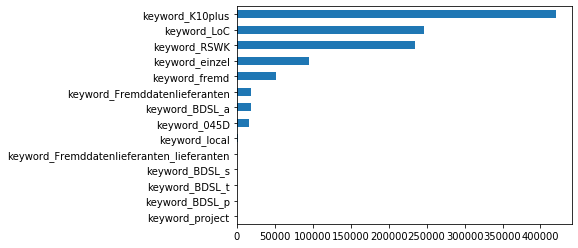

In [13]:
df[keywords_columns_lt].dropna(how="all").notna().sum().sort_values().plot.barh()

In [14]:
df[keywords_columns_lt].dropna(how="all").notna().sum().sort_values()

keyword_project                                   0
keyword_BDSL_p                                    0
keyword_BDSL_t                                    0
keyword_BDSL_s                                    0
keyword_Fremddatenlieferanten_lieferanten         0
keyword_local                                  2005
keyword_045D                                  15726
keyword_BDSL_a                                18670
keyword_Fremddatenlieferanten                 18670
keyword_fremd                                 51143
keyword_einzel                                94806
keyword_RSWK                                 235067
keyword_LoC                                  246615
keyword_K10plus                              419859
dtype: int64

In [15]:
keywords_columns_lt = df[keywords_columns_lt].dropna(how="all").notna().sum().sort_values().index[5:].tolist()

C:\Users\calvotello\Dropbox\MTB\Göttingen\research\librarian_robot\visualize.py:90: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


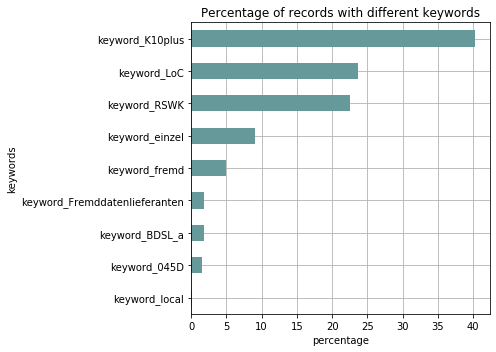

In [16]:
visualize.plot_bar_not_nas(df[keywords_columns_lt], figsize = (7,5), title = "Percentage of records with different keywords", xlabel = "percentage", ylabel = "keywords", figure_name= "figure_18_bar_not_na_keywords")

In [17]:
df[keywords_columns_lt].dropna(how="all").shape[0] / df.shape[0] * 100

69.56512554205668

In [18]:
for column in keywords_columns_lt:
    df[column] = df[column].fillna("").astype(str)

In [19]:
keywords_columns_lt

['keyword_local',
 'keyword_045D',
 'keyword_BDSL_a',
 'keyword_Fremddatenlieferanten',
 'keyword_fremd',
 'keyword_einzel',
 'keyword_RSWK',
 'keyword_LoC',
 'keyword_K10plus']

In [20]:
selected_columns_lt = ['keyword_RSWK',
 'keyword_LoC',
 'keyword_K10plus']

In [21]:
#df['keywords'] = df[selected_columns_lt].agg(set, axis=1)

In [22]:
df['keywords'] = df[selected_columns_lt].agg('|'.join, axis=1)

In [23]:
df["keywords"] = df["keywords"].str.replace("\|+","|")
df["keywords"] = df["keywords"].str.replace("(?:^\||\|$)+","")

In [24]:
df["keywords"]

ppn
1642067407                                             
1678415065    Frankreich|Buchhandel|Buchproduktion|DA-3
1678415065    Frankreich|Buchhandel|Buchproduktion|DA-3
1678415065    Frankreich|Buchhandel|Buchproduktion|DA-3
1678415065    Frankreich|Buchhandel|Buchproduktion|DA-3
                                ...                    
448323834                                              
448323834                                              
44832184X                                              
44832184X                                              
44832184X                                              
Name: keywords, Length: 1041404, dtype: object

In [25]:
df = df.loc[df["keywords"] != ""]

In [26]:
round((df.shape[0] / 1041404)*100, 2)

56.29

In [27]:
df["keywords"].value_counts().head(20)

Spanisch                                       2358
Französisch                                    2078
Französisch|Literatur                          1932
Italienisch                                    1615
Italienisch|Literatur                          1286
Französisch|Grammatik                          1239
Electronic books                               1042
Französisch|Deutsch                            1030
Spanisch|Grammatik                             1002
Spanisch|Deutsch                                718
Spanisch|Literatur                              622
Italienisch|Grammatik                           590
Französisch|Literatur|Französisch|Literatur     586
Spanischunterricht                              585
Französischunterricht                           582
Romanische Sprachen                             553
Portugiesisch                                   547
Frankreich                                      535
Italienisch|Deutsch                             512
Beckett     

In [28]:
df[["title", "keywords"]].sample(10,random_state=2022).to_csv("./../data/exampple_keywords.tsv", sep="\t")

In [29]:
df["keywords"].value_counts

<bound method IndexOpsMixin.value_counts of ppn
1678415065            Frankreich|Buchhandel|Buchproduktion|DA-3
1678415065            Frankreich|Buchhandel|Buchproduktion|DA-3
1678415065            Frankreich|Buchhandel|Buchproduktion|DA-3
1678415065            Frankreich|Buchhandel|Buchproduktion|DA-3
1678415065            Frankreich|Buchhandel|Buchproduktion|DA-3
                                    ...                        
800141377                                 Französisch|Literatur
800141377                                 Französisch|Literatur
800135350         Spanien|Städtebau|Korruption|Bekämpfung|Recht
800132432     Galician language|Languages in contact|Endange...
800132432     Galician language|Languages in contact|Endange...
Name: keywords, Length: 586193, dtype: object>

In [30]:
df["keywords"]

ppn
1678415065            Frankreich|Buchhandel|Buchproduktion|DA-3
1678415065            Frankreich|Buchhandel|Buchproduktion|DA-3
1678415065            Frankreich|Buchhandel|Buchproduktion|DA-3
1678415065            Frankreich|Buchhandel|Buchproduktion|DA-3
1678415065            Frankreich|Buchhandel|Buchproduktion|DA-3
                                    ...                        
800141377                                 Französisch|Literatur
800141377                                 Französisch|Literatur
800135350         Spanien|Städtebau|Korruption|Bekämpfung|Recht
800132432     Galician language|Languages in contact|Endange...
800132432     Galician language|Languages in contact|Endange...
Name: keywords, Length: 586193, dtype: object

In [31]:
round(df["keywords"].notna().sum() / df.shape[0], 2)*100

100.0

In [32]:
keywords_df = tokenize.tokenize_column(df, "keywords",  ngram_range=(1,1), analyzer="word",  reg_ex='(?u)\\b[^\|]+\\b', max_features = 2000, add_name_of_original_column = False)

Shape of tokens:  (586193, 2000)
Shape of tokens after filtering:  (586193, 2000)


In [33]:
keywords_df

französisch  literatur  spanisch  italienisch  de-101  frankreich  \
1678415065            0          0         0            0       0           1   
1678415065            0          0         0            0       0           1   
1678415065            0          0         0            0       0           1   
1678415065            0          0         0            0       0           1   
1678415065            0          0         0            0       0           1   
...                 ...        ...       ...          ...     ...         ...   
800141377             1          1         0            0       0           0   
800141377             1          1         0            0       0           0   
800135350             0          0         0            0       0           0   
800132432             0          0         0            0       0           0   
800132432             0          0         0            0       0           0   

            history and criticism  bvb  deutsch  spanish language  ...  dandy  \
1678415065                      0    0        0                 0  ...      0   
1678415065                      0    0        0                 0  ...      0   
1678415065                      0    0        0                 0  ...      0   
1678415065                      0    0        0                 0  ...      0   
1678415065                      0    0        0                 0  ...      0   
...                           ...  ...      ...               ...  ...    ...   
800141377                       0    0        0                 0  ...      0   
800141377                       0    0        0                 0  ...      0   
800135350                       0    0        0                 0  ...      0   
800132432                       0    0        0                 0  ...      0   
800132432                       0    0        0                 0  ...      0   

            mentalität  early modern, 1500-1700  quantifizierung  \
1678415065           0                        0                0   
1678415065           0                        0                0   
1678415065           0                        0                0   
1678415065           0                        0                0   
1678415065           0                        0                0   
...                ...                      ...              ...   
800141377            0                        0                0   
800141377            0                        0                0   
800135350            0                        0                0   
800132432            0                        0                0   
800132432            0                        0                0   

            äquatorialguinea  brazilian fiction  balkan peninsula  1799-1850  \
1678415065                 0                  0                 0          0   
1678415065                 0                  0                 0          0   
1678415065                 0                  0                 0          0   
1678415065                 0                  0                 0          0   
1678415065                 0                  0                 0          0   
...                      ...                ...               ...        ...   
800141377                  0                  0                 0          0   
800141377                  0                  0                 0          0   
800135350                  0                  0                 0          0   
800132432                  0                  0                 0          0   
800132432                  0                  0                 0          0   

            soziale integration  kürzestgeschichte  
1678415065                    0                  0  
1678415065                    0                  0  
1678415065                    0                  0  
1678415065                    0                  0  
1678415065             

In [34]:
keywords_df.values.max()

18

In [35]:
keywords_df = keywords_df.astype(bool).astype(int)

In [36]:
re.findall(r"^[\d\-]+$", "1265-1321",  flags=re.M)

['1265-1321']

In [37]:
keywords_to_delete = []

In [38]:
for column in keywords_df.columns.tolist():
    if len(re.findall(r"^[\d\- ]+$", column,  flags=re.M)) > 0:
        keywords_to_delete.append(column)
        print(column)


1712-1778
1265-1321
1533-1592
1713-1784
1547-1616
1945
1871-1922
1313-1375
1783-1842
1304-1374
1268-1559
1622-1673
1600-1681
1694-1778
1821-1867
1799-1850


In [39]:
for column in keywords_df.columns.tolist():
    if len(column) < 5:
        print(column)


bvb
bsz
obv
frau
film
da-3
hbz
verb
da3
usa
zola
kuba
hugo
peru
raum
vega
law
epik
gide
sand
exil
eco
zeit
cuba
kind
tod
jews
levi
epos
name
text
oper
rom
bild
held
buch
mann
art
ark
ich
paz
char
adel
hof
vian
rome
rime
fo
lied
stil
mode
arts
gary
sade
alas
1945
fest
and
puig
cela
bloy
arlt
aub
kant
vico
urfé
gral
rosa
loti
luzi
ehe
león
wien
20th
wort
geld


In [40]:
keywords_df.iloc[:,0:20].sum()

französisch              99118
literatur                81488
spanisch                 58969
italienisch              40097
de-101                   40866
frankreich               30928
history and criticism    26619
bvb                      30385
deutsch                  23724
spanish language         14898
france                   13995
french language          14670
history                  14371
romanische sprachen      17001
rezeption                17463
roman                    15424
congresses                7606
20th century             12880
french literature        13134
spanien                  13634
dtype: int64

In [41]:
keywords_columns_lt = keywords_df.columns.tolist()
len(keywords_columns_lt)

2000

In [42]:
keywords_to_delete = keywords_to_delete + ["de-101", "bvb", "bsz", "obv", 'da-3', 'da3', 'de-25/sred20', 'de-21/19', 'de-25/sred19','de-576',"de-600", "hbz"]


In [43]:
for keyword in keywords_to_delete:
    try:
        keywords_columns_lt.remove(keyword)
    except:
        pass


In [44]:
len(keywords_columns_lt)

1972

In [45]:
keywords_df = keywords_df[keywords_columns_lt]

In [46]:

#for keyword in keywords_to_delete:
#    #if keyword in keywords_df.columns.tolist():
#    keywords_df.drop(keyword, axis="columns", inplace=True)


In [47]:
#keywords_df = keywords_df.max()


In [48]:
keywords_df

französisch  literatur  spanisch  italienisch  frankreich  \
1678415065            0          0         0            0           1   
1678415065            0          0         0            0           1   
1678415065            0          0         0            0           1   
1678415065            0          0         0            0           1   
1678415065            0          0         0            0           1   
...                 ...        ...       ...          ...         ...   
800141377             1          1         0            0           0   
800141377             1          1         0            0           0   
800135350             0          0         0            0           0   
800132432             0          0         0            0           0   
800132432             0          0         0            0           0   

            history and criticism  deutsch  spanish language  france  \
1678415065                      0        0                 0       0   
1678415065                      0        0                 0       0   
1678415065                      0        0                 0       0   
1678415065                      0        0                 0       0   
1678415065                      0        0                 0       0   
...                           ...      ...               ...     ...   
800141377                       0        0                 0       0   
800141377                       0        0                 0       0   
800135350                       0        0                 0       0   
800132432                       0        0                 0       0   
800132432                       0        0                 0       0   

            french language  ...  booksellers and bookselling  dandy  \
1678415065                0  ...                            0      0   
1678415065                0  ...                            0      0   
1678415065                0  ...                            0      0   
1678415065                0  ...                            0      0   
1678415065                0  ...                            0      0   
...                     ...  ...                          ...    ...   
800141377                 0  ...                            0      0   
800141377                 0  ...                            0      0   
800135350                 0  ...                            0      0   
800132432                 0  ...                            0      0   
800132432                 0  ...                            0      0   

            mentalität  early modern, 1500-1700  quantifizierung  \
1678415065           0                        0                0   
1678415065           0                        0                0   
1678415065           0                        0                0   
1678415065           0                        0                0   
1678415065           0                        0                0   
...                ...                      ...              ...   
800141377            0                        0                0   
800141377            0                        0                0   
800135350            0                        0                0   
800132432            0                        0                0   
800132432            0                        0                0   

            äquatorialguinea  brazilian fiction  balkan peninsula  \
1678415065                 0                  0                 0   
1678415065                 0                  0                 0   
1678415065                 0                  0                 0   
1678415065                 0                  0                 0   
1678415065                 0                  0                 0   
...                      ...                ...               ...   
800141377                  0                  0                 0   
800141377                  0        

In [49]:
keywords_df.iloc[:,30:50].columns.tolist()

['italy',
 'linguistik',
 'kultur',
 'französischunterricht',
 'italian literature',
 'theater',
 '19th century',
 'spanish literature',
 'romance languages',
 '18th century',
 'sprache',
 'proust',
 'englisch',
 'hispanoamerika',
 'syntax',
 'wortschatz',
 'frau',
 'latin america',
 'dictionaries',
 'schriftsteller']

C:\Users\calvotello\Dropbox\MTB\Göttingen\research\librarian_robot\visualize.py:181: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


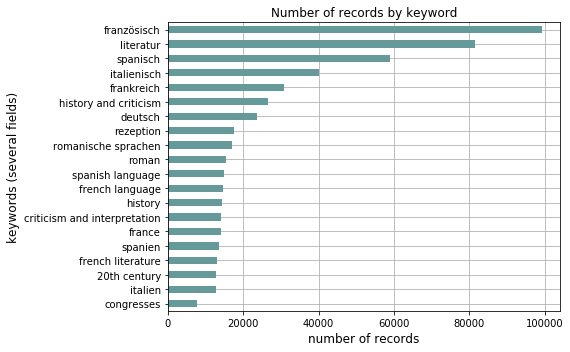

In [50]:
visualize.plot_bars(keywords_df.iloc[:,0:20], figsize= (8,5), title = "Number of records by keyword", xlabel = "number of records", ylabel = "keywords (several fields)", figure_name= "bar_keywords_number")

In [51]:
keywords_lt = keywords_df.columns.tolist()

In [52]:
for column in keywords_lt:
    if len(column) < 1:
        print(column)


In [53]:
df = pd.concat([df, keywords_df], axis=1)

In [54]:
keywords_columns_lt

['französisch',
 'literatur',
 'spanisch',
 'italienisch',
 'frankreich',
 'history and criticism',
 'deutsch',
 'spanish language',
 'france',
 'french language',
 'history',
 'romanische sprachen',
 'rezeption',
 'roman',
 'congresses',
 '20th century',
 'french literature',
 'spanien',
 'criticism and interpretation',
 'italien',
 'deutschland',
 'grammatik',
 'lyrik',
 'drama',
 'italian language',
 'portugiesisch',
 'lateinamerika',
 'spain',
 'kongress',
 'übersetzung',
 'italy',
 'linguistik',
 'kultur',
 'französischunterricht',
 'italian literature',
 'theater',
 '19th century',
 'spanish literature',
 'romance languages',
 '18th century',
 'sprache',
 'proust',
 'englisch',
 'hispanoamerika',
 'syntax',
 'wortschatz',
 'frau',
 'latin america',
 'dictionaries',
 'schriftsteller',
 'cervantes saavedra',
 'katalanisch',
 'altfranzösisch',
 'europa',
 'beckett',
 'french fiction',
 'rumänisch',
 'mundart',
 'film',
 'germany',
 'kunst',
 'renaissance',
 'poetik',
 'verb',
 'rous

In [55]:

#df.loc[df["keywords"].str.contains("f Aufsatzsammlung")][["keywords"] + keywords_columns_lt  ]


## Year Keywords

In [56]:
years_keywords_df = df.groupby(["year_publication"])[keywords_lt].sum()
years_keywords_df

französisch  literatur  spanisch  italienisch  frankreich  \
year_publication                                                              
1980                     1256        794       522          310         461   
1981                     1453        924       419          288         455   
1982                     1606       1148       465          364         460   
1983                     1505       1127       571          412         410   
1984                     1745       1317       579          545         730   
1985                     1416       1077       740          329         707   
1986                     1574       1070       767          483         594   
1987                     1699       1115       697          559         587   
1988                     1854       1425       734          630         567   
1989                     1952       1431       817          719         560   
1990                     1871       1429      1152          959         784   
1991                     2596       1687      1281          978         613   
1992                     2330       1789      1186          999         713   
1993                     2473       1841      1243         1071         835   
1994                     3159       2232      1527         1165         698   
1995                     2997       2086      1702         1201         859   
1996                     3197       2546      1677         1492         939   
1997                     3199       2318      1745         1240         790   
1998                     3759       2215      1725         1171        1000   
1999                     3326       2614      1594         1448        1133   
2000                     3271       2478      1956         1411        1121   
2001                     3410       2381      1991         1413        1140   
2002                     2880       2408      1728         1271         952   
2003                     2800       2686      1778         1578         851   
2004                     2824       2601      1943         1311         794   
2005                     3038       2810      2092         1537        1019   
2006                     3131       2507      2023         1273         985   
2007                     3084       2435      2008         1328         982   
2008                     3109       2557      2015         1195         882   
2009                     2771       2163      2023         1177         783   
2010                     2930       2755      2087         1156         830   
2011                     2976       2561      2303         1311         933   
2012                     2900       2758      2424         1423         755   
2013                     2718       2570      2092         1040         836   
2014                     2330       2201      1959          864         707   
2015                     2245       2341      1692          986         913   
2016                     2512       2518      1653          911         877   
2017                     2022       2082      1314          847         571   
2018                     1652       2303      1406          970         559   
2019                     1548       2188      1339          732         543   

                  history and criticism  deutsch  spanish language  france  \
year_publication                                                             
1980                                264      175                81     137   
1981                                343      254                44     130   
1982                                401      196                73     205   
1983                                432      269                63     167   
1984                                437      286                74     284   
1985                                300      267               116     337   
1986                                416      320               172     191 

In [57]:
years_keywords_rel_df = (years_keywords_df.loc[:].div(years_keywords_df.sum(axis='columns'), axis="index")*100).round(2)

In [58]:
years_keywords_rel_df

französisch  literatur  spanisch  italienisch  frankreich  \
year_publication                                                              
1980                     7.25       4.58      3.01         1.79        2.66   
1981                     8.52       5.42      2.46         1.69        2.67   
1982                     8.21       5.87      2.38         1.86        2.35   
1983                     7.21       5.40      2.74         1.97        1.96   
1984                     7.05       5.32      2.34         2.20        2.95   
1985                     6.32       4.81      3.30         1.47        3.16   
1986                     5.81       3.95      2.83         1.78        2.19   
1987                     6.82       4.48      2.80         2.24        2.36   
1988                     6.15       4.73      2.44         2.09        1.88   
1989                     5.88       4.31      2.46         2.17        1.69   
1990                     4.97       3.80      3.06         2.55        2.08   
1991                     5.94       3.86      2.93         2.24        1.40   
1992                     5.27       4.05      2.68         2.26        1.61   
1993                     5.17       3.85      2.60         2.24        1.75   
1994                     5.45       3.85      2.63         2.01        1.20   
1995                     5.25       3.65      2.98         2.10        1.50   
1996                     5.50       4.38      2.89         2.57        1.62   
1997                     5.95       4.31      3.24         2.31        1.47   
1998                     7.08       4.17      3.25         2.20        1.88   
1999                     5.84       4.59      2.80         2.54        1.99   
2000                     5.41       4.10      3.23         2.33        1.85   
2001                     5.70       3.98      3.33         2.36        1.91   
2002                     4.70       3.93      2.82         2.07        1.55   
2003                     4.52       4.33      2.87         2.55        1.37   
2004                     4.61       4.25      3.17         2.14        1.30   
2005                     4.77       4.41      3.28         2.41        1.60   
2006                     5.42       4.34      3.50         2.20        1.71   
2007                     5.57       4.40      3.63         2.40        1.77   
2008                     5.69       4.68      3.69         2.19        1.61   
2009                     5.46       4.26      3.99         2.32        1.54   
2010                     5.33       5.01      3.80         2.10        1.51   
2011                     4.80       4.13      3.71         2.11        1.50   
2012                     4.95       4.71      4.14         2.43        1.29   
2013                     5.27       4.98      4.05         2.01        1.62   
2014                     4.80       4.53      4.03         1.78        1.46   
2015                     4.56       4.75      3.43         2.00        1.85   
2016                     4.79       4.80      3.15         1.74        1.67   
2017                     4.71       4.85      3.06         1.97        1.33   
2018                     4.22       5.88      3.59         2.48        1.43   
2019                     4.95       7.00      4.28         2.34        1.74   

                  history and criticism  deutsch  spanish language  france  \
year_publication                                                             
1980                               1.52     1.01              0.47    0.79   
1981                               2.01     1.49              0.26    0.76   
1982                               2.05     1.00              0.37    1.05   
1983                               2.07     1.29              0.30    0.80   
1984                               1.77     1.16              0.30    1.15   
1985                               1.34     1.19              0.52    1.50   
1986                               1.54     1.18              0.63    0.70 

In [59]:
visualize.plot_lines(years_keywords_rel_df.iloc[:,0:10], title = "Choronological development of percentage of records by keyword\n(top 10)", cmap = cmap_20, xlabel = "year of publication", ylabel = "percentantage", figure_name = "plot_lines_keywords_10", title_legend = "Keywords")


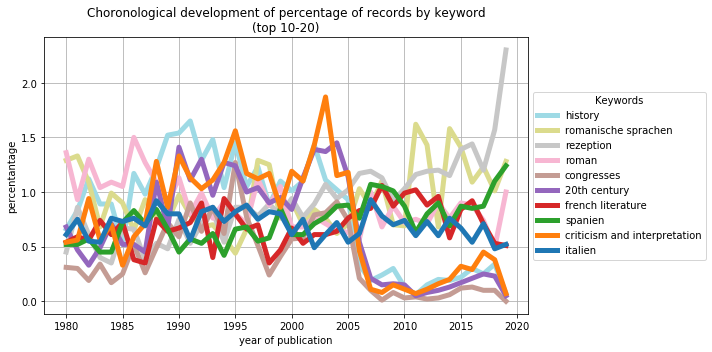

In [60]:
visualize.plot_lines(years_keywords_rel_df.iloc[:,10:20], title = "Choronological development of percentage of records by keyword\n(top 10-20)", cmap = cmap_20, xlabel = "year of publication", ylabel = "percentantage", figure_name = "plot_lines_keywords_20", title_legend = "Keywords")


In [61]:
years_keywords_rel_df.diff().sum().sort_values(ascending=False).index.tolist()[0:20]

['literatur',
 'rezeption',
 'spanisch',
 'de-16/s55-19',
 'de-24/20sred',
 'spanien',
 'politik',
 'italienisch',
 'übersetzung',
 'de-24/19sred',
 'film',
 'lateinamerika',
 'deutsch',
 'argentinien',
 'lyrik',
 'kunst',
 'hispanoamerika',
 'sprachkontakt',
 'siglo de oro',
 'mexiko']

C:\Users\calvotello\Dropbox\MTB\Göttingen\research\librarian_robot\visualize.py:181: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


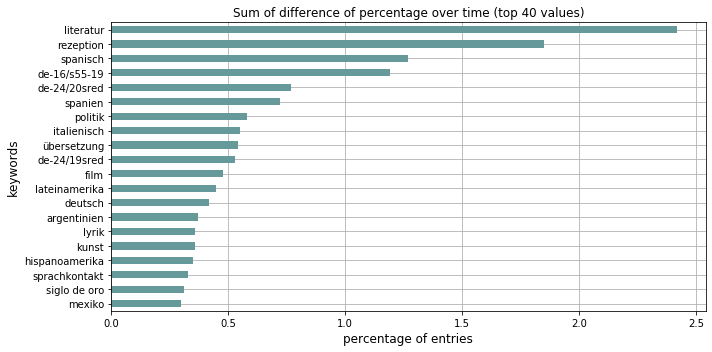

In [62]:
visualize.plot_bars(years_keywords_rel_df.diff(), head = 20, percentage = False, title = "Sum of difference of percentage over time (top 40 values)", xlabel= "percentage of entries", ylabel = "keywords", figure_name = "bar_diff_keywords")

In [63]:
years_keywords_rel_df.diff().sum().sort_values(ascending=False).head(40).sort_values(ascending=True).plot.barh(figsize=(5,10))

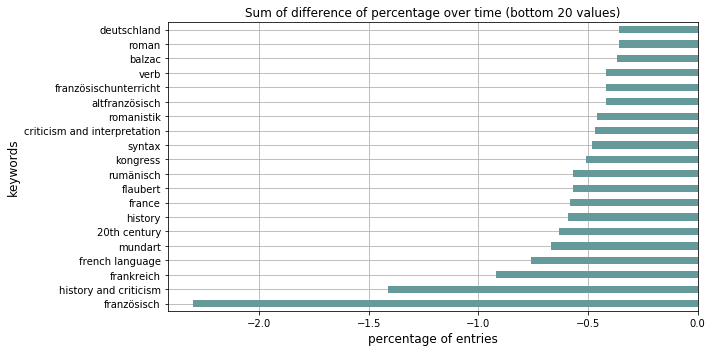

In [64]:
visualize.plot_bars(years_keywords_rel_df.diff(), tail = 20, percentage = False, title = "Sum of difference of percentage over time (bottom 20 values)", xlabel= "percentage of entries", ylabel = "keywords", figure_name = "bar_diff_keywords_bottom")

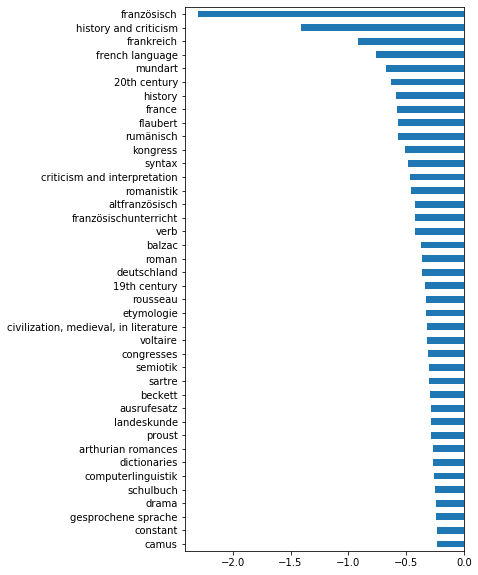

In [65]:
years_keywords_rel_df.diff().sum().sort_values(ascending=False).tail(40).plot.barh(figsize=(5,10))

In [66]:
regression_results_df = statistical_tests.calculate_regression_line(years_keywords_rel_df)

In [67]:
regression_results_df.index = regression_results_df.column

In [68]:
regression_results_df

column     slope   intercept    rvalue  \
column                                                                         
spanisch                            spanisch  0.034826  -66.471245  0.778350   
rezeption                          rezeption  0.027524  -54.120268  0.855830   
spanish language            spanish language  0.017266  -33.763700  0.758224   
film                                    film  0.012947  -25.663961  0.902582   
spanien                              spanien  0.011826  -22.911619  0.702042   
...                                      ...       ...         ...       ...   
france                                france -0.019439   39.661329 -0.703666   
frankreich                        frankreich -0.025206   52.199655 -0.649835   
history                              history -0.028732   58.251049 -0.680146   
history and criticism  history and criticism -0.053252  107.954814 -0.682111   
französisch                      französisch -0.065147  135.908735 -0.762332   

                             pvalue    stderr  
column                                         
spanisch               3.382407e-09  0.004557  
rezeption              1.966882e-12  0.002699  
spanish language       1.455282e-08  0.002409  
film                   1.749580e-15  0.001002  
spanien                4.463141e-07  0.001946  
...                             ...       ...  
france                 4.087877e-07  0.003184  
frankreich             5.690155e-06  0.004783  
history                1.381753e-06  0.005024  
history and criticism  1.253385e-06  0.009261  
französisch            1.093068e-08  0.008972  

[1972 rows x 6 columns]

In [69]:
regression_results_df["expectation_2020"] = (regression_results_df["slope"] * 2020) + regression_results_df["intercept"]

In [70]:
regression_results_df["expectation_2030"] = (regression_results_df["slope"] * 2030) + regression_results_df["intercept"]

In [71]:
regression_results_df["expectation_2040"] = (regression_results_df["slope"] * 2040) + regression_results_df["intercept"]

In [72]:
regression_results_df

column     slope   intercept    rvalue  \
column                                                                         
spanisch                            spanisch  0.034826  -66.471245  0.778350   
rezeption                          rezeption  0.027524  -54.120268  0.855830   
spanish language            spanish language  0.017266  -33.763700  0.758224   
film                                    film  0.012947  -25.663961  0.902582   
spanien                              spanien  0.011826  -22.911619  0.702042   
...                                      ...       ...         ...       ...   
france                                france -0.019439   39.661329 -0.703666   
frankreich                        frankreich -0.025206   52.199655 -0.649835   
history                              history -0.028732   58.251049 -0.680146   
history and criticism  history and criticism -0.053252  107.954814 -0.682111   
französisch                      französisch -0.065147  135.908735 -0.762332   

                             pvalue    stderr  expectation_2020  \
column                                                            
spanisch               3.382407e-09  0.004557          3.878192   
rezeption              1.966882e-12  0.002699          1.479000   
spanish language       1.455282e-08  0.002409          1.114462   
film                   1.749580e-15  0.001002          0.489923   
spanien                4.463141e-07  0.001946          0.975923   
...                             ...       ...               ...   
france                 4.087877e-07  0.003184          0.394500   
frankreich             5.690155e-06  0.004783          1.282769   
history                1.381753e-06  0.005024          0.213000   
history and criticism  1.253385e-06  0.009261          0.385077   
französisch            1.093068e-08  0.008972          4.311231   

                       expectation_2030  expectation_2040  
column                                                     
spanisch                       4.226457          4.574721  
rezeption                      1.754244          2.029488  
spanish language               1.287126          1.459790  
film                           0.619398          0.748872  
spanien                        1.094178          1.212433  
...                                 ...               ...  
france                         0.200110          0.005720  
frankreich                     1.030705          0.778642  
history                       -0.074317         -0.361634  
history and criticism         -0.147447         -0.679970  
französisch                    3.659758          3.008285  

[1972 rows x 9 columns]

C:\Users\calvotello\Dropbox\MTB\Göttingen\research\librarian_robot\visualize.py:181: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


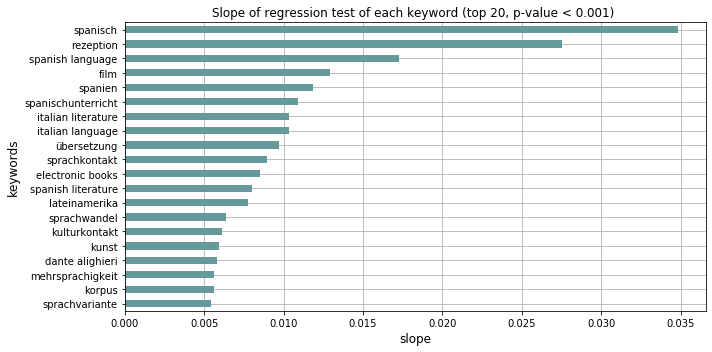

In [73]:
visualize.plot_bars(regression_results_df.loc[(regression_results_df["pvalue"] < 0.001) & (regression_results_df["slope"] > 0) ][["slope"]].head(20).T, title ="Slope of regression test of each keyword (top 20, p-value < 0.001) ", xlabel ="slope", ylabel = "keywords", figure_name = "figure_19_keywords_slope_top")

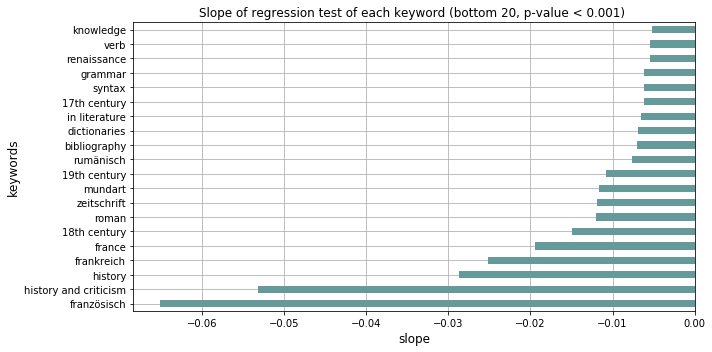

In [74]:
visualize.plot_bars(regression_results_df.loc[(regression_results_df["pvalue"] < 0.001) & (regression_results_df["slope"] < 0) ][["slope"]].tail(20).T, title ="Slope of regression test of each keyword (bottom 20, p-value < 0.001) ", xlabel ="slope", ylabel = "keywords", figure_name = "figure_20_keywords_slope_bottom")

In [75]:
regression_results_df.loc[(regression_results_df["pvalue"] < 0.001) & (regression_results_df["slope"] < 0) ][["slope"]].tail(20)

slope
column                         
knowledge             -0.005208
verb                  -0.005381
renaissance           -0.005425
grammar               -0.006161
syntax                -0.006167
17th century          -0.006189
in literature         -0.006575
dictionaries          -0.006913
bibliography          -0.006969
rumänisch             -0.007683
19th century          -0.010758
mundart               -0.011693
zeitschrift           -0.011876
roman                 -0.011964
18th century          -0.014977
france                -0.019439
frankreich            -0.025206
history               -0.028732
history and criticism -0.053252
französisch           -0.065147

In [76]:
df.loc[df["surrealismus"]> 0].sample(10)

medium                                              title  \
ppn                                                                    
33526509X     Aau                                      Sade, surreal   
500029075     Aau                         André Breton: Dossier Dada   
1606090666    Aau                              Surréalisme et cinéma   
09002429X     Aau                     Der @französische Surrealismus   
163481097X    Aau                                  Les @surréalistes   
360222919     Eau  La @figure fémine dans l'imaginaire d'André Br...   
528944479     Aau                               Surrealismo siglo 21   
015814467     Aau                    Die @surrealistische Revolution   
161321038     Aau                        Geschichte des Surrealismus   
122536770     Aau                                 Ma vie surréaliste   

                                             title_supplement  year  \
ppn                                                                   
33526509X   der Marquis de Sade und die erotische Fantasie...  2001   
500029075   [erscheint anläßlich der Ausstellung Andre Bre...  2005   
1606090666                                               None  2000   
09002429X            Studien zur avantgardistischen Literatur  1996   
163481097X                                               None  1995   
360222919   recherche comparative entre le surréalisme fra...  2000   
528944479                            [congreso internacional]  2006   
015814467                                          1924, 1925  1984   
161321038                                                None  1986   
122536770                                                None  1992   

              entry_first author_first_name author_last_name author_gnd_id  \
ppn                                                                          
33526509X   2001:17-10-01              None             None          None   
500029075   2001:22-09-05              None             None          None   
1606090666  KNUB:30-09-99              None             None          None   
09002429X   2001:24-11-95             Peter           Bürger     079319483   
163481097X  FRUB:08-02-95          Philippe           Audoin          None   
360222919   0001:31-01-03        Constantin           Makris          None   
528944479   2009:15-05-07              None             None          None   
015814467   2000:25-05-87              None             None          None   
161321038   2001:04-09-94           Maurice           Nadeau     079778550   
122536770   2003:18-02-93             Henri       Pastoureau     706486889   

           editor_first_name editor_last_name  ...  \
ppn                                            ...   
33526509X              Tobia          Bezzola  ...   
500029075        Tobia|André   Bezzola|Breton  ...   
1606090666    Georges-Albert            Astre  ...   
09002429X               None             None  ...   
163481097X              None             None  ...   
360222919               None             None  ...   
528944479       Domingo-Luis        Hernández  ...   
015814467               None             None  ...   
161321038          Karl Hein            Laier  ...   
122536770               None             None  ...   

           booksellers and bookselling dandy mentalität  \
ppn                                                       
33526509X                            0     0          0   
500029075                            0     0          0   
1606090666                           0     0          0   
09002429X                            0     0          0   
163481097X                           0     0          0   
360222919                            0     0          0   
528944479                            0     0          0   
015814467                            0     0          0   
161321038                            0     0          0   
122536770                            0     0          0   

In [77]:
df.loc[df["verb"]> 0].sample(10)

medium                                              title  \
ppn                                                                    
390676187     Aau                 Dependenz, Valenz und Wortstellung   
59764490X     Aau                          Die @französischen Verben   
478477597     Aau                                  I @verbi italiani   
346927196     Acu  Sprachgeographische Untersuchungen zur Verbals...   
1655195301    Oau                           Las familias de palabras   
1658642317    Oan  Untersuchungen zur Verbalsyntax der Liviusüber...   
551119926     Aau          L' @énonciation en linguistique française   
031783929     Acu         Typologie de la morphologie verbale romane   
182714179     Aau                                Temps, mode, aspect   
654281610     Aau  Klassifizierung französischer Verben in der ge...   

                                             title_supplement  year  \
ppn                                                                   
390676187   [Tagung am 6. und 7. Mai 2002 an der Germanist...  2004   
59764490X                                     Nachschlagewerk  2009   
478477597                       grammatica, esercizi e giochi  2004   
346927196                                                None  2001   
1655195301  Relaciones entre morfología, semántica y estru...  2014   
1658642317  Ein Versuch zur Anwendung quantitativer Method...  1997   
551119926                                                None  2007   
031783929                                                None  1991   
182714179   les approches des morphèmes verbaux et leurs p...  1990   
654281610                                                None  2011   

                   entry_first author_first_name  author_last_name  \
ppn                                                                  
390676187        2001:15-07-04              None              None   
59764490X        2001:15-04-09      Otto-Michael             Blume   
478477597        2009:02-02-05             Sonia           Bailini   
346927196        0008:08-05-02          Wilfried            Breier   
1655195301  DEGRUYTER:06-03-15            Héctor  Hernández Arocha   
1658642317  DEGRUYTER:22-10-15             Peter             Stein   
551119926        0008:06-12-07         Dominique       Maingueneau   
031783929        2000:10-12-91             Maria           Iliescu   
182714179        0003:23-03-95         Jean-Paul           Confais   
654281610        2001:16-03-11            Julius            Becker   

           author_gnd_id editor_first_name editor_last_name  ...  \
ppn                                                          ...   
390676187           None      Ulrich|Meike     Engel|Meliss  ...   
59764490X     123942857X              None             None  ...   
478477597           None              None             None  ...   
346927196           None              None             None  ...   
1655195301     818401893              None             None  ...   
1658642317          None              None             None  ...   
551119926           None              None             None  ...   
031783929      079888895              None             None  ...   
182714179           None              None             None  ...   
654281610      704671093              None             None  ...   

           booksellers and bookselling dandy mentalität  \
ppn                                                       
390676187                            0     0          0   
59764490X                            0     0          0   
478477597                            0     0          0   
346927196                            0     0          0   
1655195301                           0     0          0   
1658642317                           0     0          0   
551119926                            0     0          0   
031783929                            0     0          0   
182714179                            0     0 

In [78]:
df.loc[df["keywords"].str.contains("zeitschrift")].sample(10)

medium                                              title  \
ppn                                                                    
1613907842    Aau                      La @prensa femenina en España   
509763103     Aau             Zielgruppe Jugend im Fokus der Werbung   
280224672     Aau  Italienbild und Stimme Italiens in den deutsch...   
1657188671    Oau  La @configuración lingüístico-discursiva en el...   
280224672     Aau  Italienbild und Stimme Italiens in den deutsch...   
862375886     Aau  El @debate literario-político en la prensa cul...   
1655713442    Oan       Romanitas - Filología Románica - Romanística   
505676559     Eau                                   Esprit au Québec   
329564889     Aau                   Angloamerikanismus und Popkultur   
273194801     Aau  "... non sono che un semplice ricercatore dell...   

                                             title_supplement  year  \
ppn                                                                   
1613907842                        (desde sus orígenes a 1868)  1992   
509763103   verbale und visuelle Kodierungsstrategien juge...  2006   
280224672                          kommentierte Bibliographie  1998   
1657188671                                               None  2018   
280224672                          kommentierte Bibliographie  1998   
862375886                                                None  2016   
1655713442                                               None  2009   
505676559   les revues comme vecteurs des échanges intelle...  2000   
329564889   Untersuchungen zur Sprache in französischen, d...  2001   
273194801   der Archivio Glottologico Italiano und die Zei...  1994   

                   entry_first author_first_name     author_last_name  \
ppn                                                                     
1613907842       S1LB:17-05-93        Inmaculada       Jiménez Morell   
509763103        2001:29-03-06             Meike               Homann   
280224672        S1LB:26-02-98           Richard           Schwaderer   
1657188671       MAUB:26-11-18      Luis Alberto    Hernando Cuadrado   
280224672        S1LB:26-02-98           Richard           Schwaderer   
862375886        0204:30-06-16              José        Checa Beltrán   
1655713442  DEGRUYTER:06-05-14            Günter               Holtus   
505676559        0001:13-01-06         Stéphanie         Angers-Fabre   
329564889        2001:23-05-01              Marc           Lilienkamp   
273194801        FRUB:28-01-94           Elke A.  Fettweis-Gatzweiler   

           author_gnd_id  editor_first_name             editor_last_name  ...  \
ppn                                                                       ...   
1613907842    124054359X               None                         None  ...   
509763103           None               None                         None  ...   
280224672      08214849X               None                         None  ...   
1657188671     794997155              Jesús               Sánchez Lobato  ...   
280224672      08214849X               None                         None  ...   
862375886      739440004               None                         None  ...   
1655713442     561345651  Fernando|Fernando  Sánchez Miret|Sánchez Miret  ...   
505676559           None               None                         None  ...   
329564889      082223602               None                         None  ...   
273194801     1241652899               None                         None  ...   

           booksellers and bookselling dandy mentalität  \
ppn                                                       
1613907842                           0     0          0   
509763103                            0     0          0   
280224672                            0     0          0   
1657188671                           0     0          0   
280224672                            0     0          0   
862375886                     

In [79]:
df.loc[df["keywords"].str.contains("dictionaries")].sample(10)

medium                                              title  \
ppn                                                                   
783341725    Aau                   Les @sémiotiques du dictionnaire   
827528523    Acu              Enciclopedia de lingüística hispánica   
67041462X    Aau                       Dictionnaires et traductions   
654417695    Aau                        Adventuring in dictionaries   
154427810    Aau  Notable encyclopedias of the late eighteenth c...   
665416628    Aau                             Gènese du dictionnaire   
834653117    OaX  Les @marques d'usage dans les dictionnaires fr...   
123856361    Aau                                Glänzende Geschäfte   
305178431    Zcu                Grande dizionario italiano dell'uso   
669621595    Aau                Diccionari de la traducció catalana   

                                            title_supplement  year  \
ppn                                                                  
783341725  actes des "Cinquièmes journées allemandes des ...  2014   
827528523                                               None  2016   
67041462X  actes des "Quatrièmes Journées Allemandes des ...  2012   
654417695         new studies in the history of lexicography  2010   
154427810              eleven successors of the Encyclopédie  1994   
665416628  l'aventure des synonymes ; actes des Septièmes...  2011   
834653117  jugements portes sur un echantillon de mots ...  1998   
123856361  die Verbreitung von Diderots "Encyclopedie", o...  1993   
305178431                                               None  1999   
669621595                                               None  2011   

             entry_first author_first_name author_last_name author_gnd_id  \
ppn                                                                         
783341725  2001:17-04-14              None             None          None   
827528523  2003:16-06-15              None             None          None   
67041462X  8112:22-10-11              None             None          None   
654417695  0001:17-03-11           John P.        Considine     624501442   
154427810  0035:27-07-94              None             None          None   
665416628  2003:03-08-11              None             None          None   
834653117  2046:08-09-15            Michel         Glatigny          None   
123856361  3085:21-04-93            Robert          Darnton     07926509X   
305178431  0700:15-11-99              None             None          None   
669621595  2009:11-10-11              None             None          None   

          editor_first_name  editor_last_name  ...  \
ppn                                            ...   
783341725          Michaela             Heinz  ...   
827528523            Javier  Gutiérrez-Rexach  ...   
67041462X    Michaela|Henri  Heinz|Meschonnic  ...   
654417695              None              None  ...   
154427810          Frank A.            Kafker  ...   
665416628          Giovanni            Dotoli  ...   
834653117              None              None  ...   
123856361             Horst           Günther  ...   
305178431            Tullio          De Mauro  ...   
669621595  Montserrat|Pilar   Bacardí|Godayol  ...   

          booksellers and bookselling dandy mentalität  \
ppn                                                      
783341725                           0     0          0   
827528523                           0     0          0   
67041462X                           0     0          0   
654417695                           0     0          0   
154427810                           0     0          0   
665416628                           0     0          0   
834653117                           0     0          0   
123856361                           0     0          0   
305178431                           0     0          0   
669621595                           0     0          0   

          early modern, 1500-1700 quantifizie

In [80]:
regression_results_df.loc[(regression_results_df["pvalue"] < 0.001) & (regression_results_df["slope"] > 0) ].sort_values(by="slope", ascending=False).head(20)

column     slope  intercept    rvalue  \
column                                                                  
spanisch                      spanisch  0.034826 -66.471245  0.778350   
rezeption                    rezeption  0.027524 -54.120268  0.855830   
spanish language      spanish language  0.017266 -33.763700  0.758224   
film                              film  0.012947 -25.663961  0.902582   
spanien                        spanien  0.011826 -22.911619  0.702042   
spanischunterricht  spanischunterricht  0.010933 -21.659575  0.849269   
italian literature  italian literature  0.010343 -20.372508  0.775667   
italian language      italian language  0.010318 -20.219614  0.567482   
übersetzung                übersetzung  0.009676 -18.919132  0.777183   
sprachkontakt            sprachkontakt  0.008973 -17.736855  0.772348   
electronic books      electronic books  0.008538 -16.888028  0.563846   
spanish literature  spanish literature  0.008025 -15.730894  0.628742   
lateinamerika            lateinamerika  0.007756 -15.023317  0.533485   
sprachwandel              sprachwandel  0.006360 -12.579270  0.691245   
kulturkontakt            kulturkontakt  0.006109 -12.109582  0.706402   
kunst                            kunst  0.005911 -11.597058  0.569797   
dante alighieri        dante alighieri  0.005811 -11.467608  0.732710   
mehrsprachigkeit      mehrsprachigkeit  0.005642 -11.168981  0.688082   
korpus                          korpus  0.005632 -11.194224  0.713692   
sprachvariante          sprachvariante  0.005437 -10.753578  0.696038   

                          pvalue    stderr  expectation_2020  \
column                                                         
spanisch            3.382407e-09  0.004557          3.878192   
rezeption           1.966882e-12  0.002699          1.479000   
spanish language    1.455282e-08  0.002409          1.114462   
film                1.749580e-15  0.001002          0.489923   
spanien             4.463141e-07  0.001946          0.975923   
spanischunterricht  4.313887e-12  0.001103          0.425885   
italian literature  4.144148e-09  0.001365          0.521038   
italian language    1.341652e-04  0.002429          0.622769   
übersetzung         3.696089e-09  0.001271          0.627115   
sprachkontakt       5.307631e-09  0.001197          0.388192   
electronic books    1.513539e-04  0.002029          0.357769   
spanish literature  1.394582e-05  0.001610          0.480269   
lateinamerika       3.929655e-04  0.001995          0.644000   
sprachwandel        7.887837e-07  0.001079          0.268385   
kulturkontakt       3.521008e-07  0.000993          0.230231   
kunst               1.241633e-04  0.001383          0.342923   
dante alighieri     7.652336e-08  0.000875          0.269615   
mehrsprachigkeit    9.277349e-07  0.000965          0.227154   
korpus              2.345970e-07  0.000897          0.182962   
sprachvariante      6.144742e-07  0.000910          0.229462   

                    expectation_2030  expectation_2040  
column                                                  
spanisch                    4.226457          4.574721  
rezeption                   1.754244          2.029488  
spanish language            1.287126          1.459790  
film                        0.619398          0.748872  
spanien                     1.094178          1.212433  
spanischunterricht          0.535219          0.644553  
italian literature          0.624472          0.727905  
italian language            0.725949          0.829129  
übersetzung                 0.723879          0.820643  
sprachkontakt               0.477920          0.567648  
electronic books            0.443144          0.528520  
spanish literature          0.560523          0.640776  
lateinamerika               0.721561          0.799122  
sprachwandel                0.331987          0.395589  
kulturkontakt               0.291319          0.352407  
kunst                       0.402032          0

In [81]:
regression_results_df.loc[(regression_results_df["pvalue"] < 0.001) & (regression_results_df["slope"] < 0) ]

column     slope   intercept    rvalue  \
column                                                                         
antonym                              antonym -0.000827    1.673871 -0.510700   
camões                                camões -0.000998    2.010249 -0.510316   
fehleranalyse                  fehleranalyse -0.001016    2.043637 -0.505872   
la @comédie humaine      la @comédie humaine -0.001052    2.127414 -0.517637   
ronsard                              ronsard -0.001060    2.149045 -0.531642   
...                                      ...       ...         ...       ...   
france                                france -0.019439   39.661329 -0.703666   
frankreich                        frankreich -0.025206   52.199655 -0.649835   
history                              history -0.028732   58.251049 -0.680146   
history and criticism  history and criticism -0.053252  107.954814 -0.682111   
französisch                      französisch -0.065147  135.908735 -0.762332   

                             pvalue    stderr  expectation_2020  \
column                                                            
antonym                7.595500e-04  0.000226          0.002538   
camões                 7.677345e-04  0.000273         -0.005962   
fehleranalyse          8.683171e-04  0.000281         -0.008577   
la @comédie humaine    6.245035e-04  0.000282          0.003192   
ronsard                4.151982e-04  0.000274          0.007769   
...                             ...       ...               ...   
france                 4.087877e-07  0.003184          0.394500   
frankreich             5.690155e-06  0.004783          1.282769   
history                1.381753e-06  0.005024          0.213000   
history and criticism  1.253385e-06  0.009261          0.385077   
französisch            1.093068e-08  0.008972          4.311231   

                       expectation_2030  expectation_2040  
column                                                     
antonym                       -0.005735         -0.014009  
camões                        -0.015943         -0.025924  
fehleranalyse                 -0.018736         -0.028896  
la @comédie humaine           -0.007324         -0.017840  
ronsard                       -0.002831         -0.013432  
...                                 ...               ...  
france                         0.200110          0.005720  
frankreich                     1.030705          0.778642  
history                       -0.074317         -0.361634  
history and criticism         -0.147447         -0.679970  
französisch                    3.659758          3.008285  

[77 rows x 9 columns]

In [82]:
visualize.plot_lines(years_keywords_rel_df[regression_results_df[["slope"]].head(10).index], title = "Choronological development of keywords with positive slope \n(top 10)", cmap = cmap_20, xlabel = "year of publication", ylabel = "percentantage", figure_name = "plot_lines_keywords_10_statistical_top", title_legend = "Keywords")



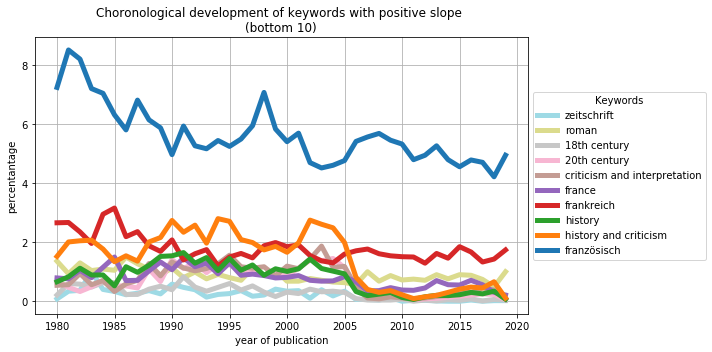

In [83]:
visualize.plot_lines(years_keywords_rel_df[regression_results_df[["slope"]].tail(10).index], title = "Choronological development of keywords with positive slope \n(bottom 10)", cmap = cmap_20, xlabel = "year of publication", ylabel = "percentantage", figure_name = "plot_lines_keywords_10_statistical_bottom", title_legend = "Keywords")


In [84]:
keywords_df.iloc[:,0:5].corr()

französisch  literatur  spanisch  italienisch  frankreich
französisch     1.000000   0.212437 -0.109999    -0.062758    0.061512
literatur       0.212437   1.000000  0.036878     0.110698    0.033276
spanisch       -0.109999   0.036878  1.000000    -0.052923   -0.075150
italienisch    -0.062758   0.110698 -0.052923     1.000000   -0.054973
frankreich      0.061512   0.033276 -0.075150    -0.054973    1.000000

In [85]:
keywords_df.iloc[:,0:20].corr()

französisch  literatur  spanisch  italienisch  \
französisch                      1.000000   0.212437 -0.109999    -0.062758   
literatur                        0.212437   1.000000  0.036878     0.110698   
spanisch                        -0.109999   0.036878  1.000000    -0.052923   
italienisch                     -0.062758   0.110698 -0.052923     1.000000   
frankreich                       0.061512   0.033276 -0.075150    -0.054973   
history and criticism            0.070804   0.145031  0.005699     0.030679   
deutsch                          0.147800   0.015541  0.078697     0.069691   
spanish language                -0.058041  -0.057180  0.344011    -0.030919   
france                           0.068261   0.018396 -0.050520    -0.037685   
french language                  0.239078  -0.050739 -0.035500    -0.020613   
history                          0.002709  -0.008601 -0.023569    -0.010139   
romanische sprachen             -0.059005   0.047885 -0.043436    -0.027823   
rezeption                       -0.017582   0.084850 -0.019573    -0.003518   
roman                            0.085785  -0.039652  0.014435    -0.013681   
congresses                      -0.009173   0.023558 -0.012285     0.005000   
20th century                    -0.002231   0.051214  0.001328     0.012584   
french literature                0.200507   0.211509 -0.048255    -0.032666   
spanien                         -0.065776   0.015727  0.090550    -0.037779   
criticism and interpretation    -0.057630  -0.039944 -0.047169    -0.033284   
italien                         -0.055365   0.020850 -0.044380     0.102242   

                              frankreich  history and criticism   deutsch  \
französisch                     0.061512               0.070804  0.147800   
literatur                       0.033276               0.145031  0.015541   
spanisch                       -0.075150               0.005699  0.078697   
italienisch                    -0.054973               0.030679  0.069691   
frankreich                      1.000000               0.012629 -0.023726   
history and criticism           0.012629               1.000000 -0.006000   
deutsch                        -0.023726              -0.006000  1.000000   
spanish language               -0.037966              -0.029546  0.010124   
france                          0.251164               0.158576 -0.011818   
french language                 0.008940              -0.021935  0.034154   
history                         0.080766               0.207029 -0.021250   
romanische sprachen            -0.035286              -0.024658  0.004434   
rezeption                       0.029877               0.030122  0.022672   
roman                          -0.014101               0.079734 -0.017914   
congresses                      0.001328               0.141084  0.002538   
20th century                    0.009549               0.430276 -0.014425   
french literature               0.090233               0.227463  0.004940   
spanien                        -0.019003               0.005104 -0.025719   
criticism and interpretation   -0.028701               0.088708 -0.028204   
italien                         0.006769               0.007792 -0.014579   

                              spanish language    france  french language  \
französisch                          -0.058041  0.068261         0.239078   
literatur                            -0.057180  0.018396        -0.050739   
spanisch                              0.344011 -0.050520        -0.035500   
italienisch                          -0.030919 -0.037685        -0.020613   
frankreich                           -0.037966  0.251164         0.008940   
history and criticism                -0.029546  0.158576        -0.021935   
deutsch                               0.010124 -0.011818         0.034154   
spanish language                      1.000000 -0.025255         0.013751   
france                               -0.025255  1.000000   

In [86]:
fig, ax = plt.subplots(figsize=(10,10))
#fig.set_size(10, 10)
sns.heatmap(keywords_df.iloc[:,0:20].corr(), annot=False, ax=ax, vmax=0.3)
fig.show()

C:\Users\calvotello\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


In [87]:
keywords_df.columns.tolist()[0:20]

['französisch',
 'literatur',
 'spanisch',
 'italienisch',
 'frankreich',
 'history and criticism',
 'deutsch',
 'spanish language',
 'france',
 'french language',
 'history',
 'romanische sprachen',
 'rezeption',
 'roman',
 'congresses',
 '20th century',
 'french literature',
 'spanien',
 'criticism and interpretation',
 'italien']

In [88]:
languages_lt = sorted([
 'französisch',
 'spanisch',
 'italienisch',
 'deutsch',
 'romanische sprachen', 
 'portugiesisch',
])

disciplines_lt = [
 'literatur',
 'linguistik']




In [89]:
fig, ax = plt.subplots(figsize=(5,5))
#fig.set_size(10, 10)
sns.heatmap(keywords_df[disciplines_lt + languages_lt].corr().round(2), annot=True, ax=ax, vmax=0.3)
fig.show()

C:\Users\calvotello\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.
